In [24]:
import os
import joblib
import pandas as pd
import numpy as np


In [14]:
# 1. Imports
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as XGBClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
import numpy as np
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
# Try to import XGBoost, but continue if not available
try:
    import xgboost as xgb
    xgboost_available = True
except ImportError:
    print("XGBoost is not installed. Skipping XGBoost model.")
    xgboost_available = False

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  

Shape : (150, 6)

Statistiques :
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000   

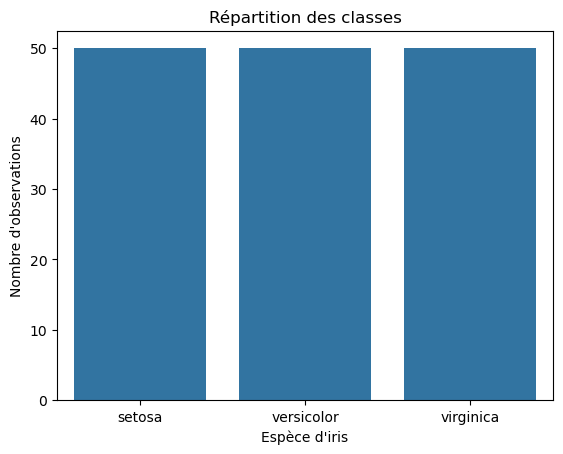

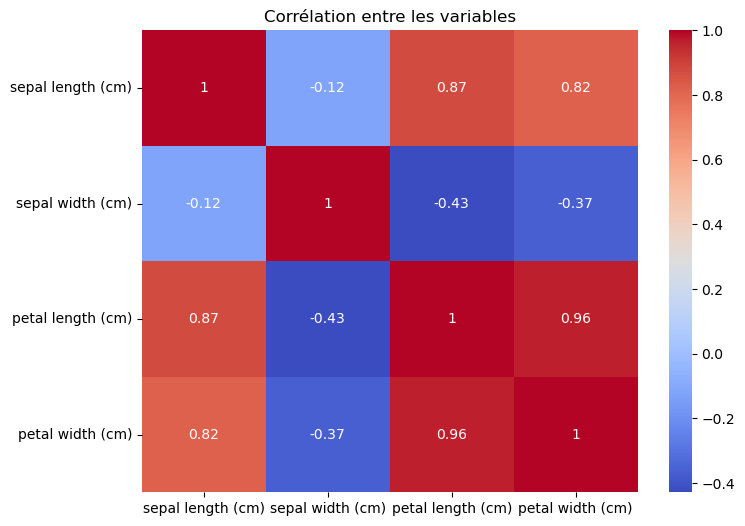

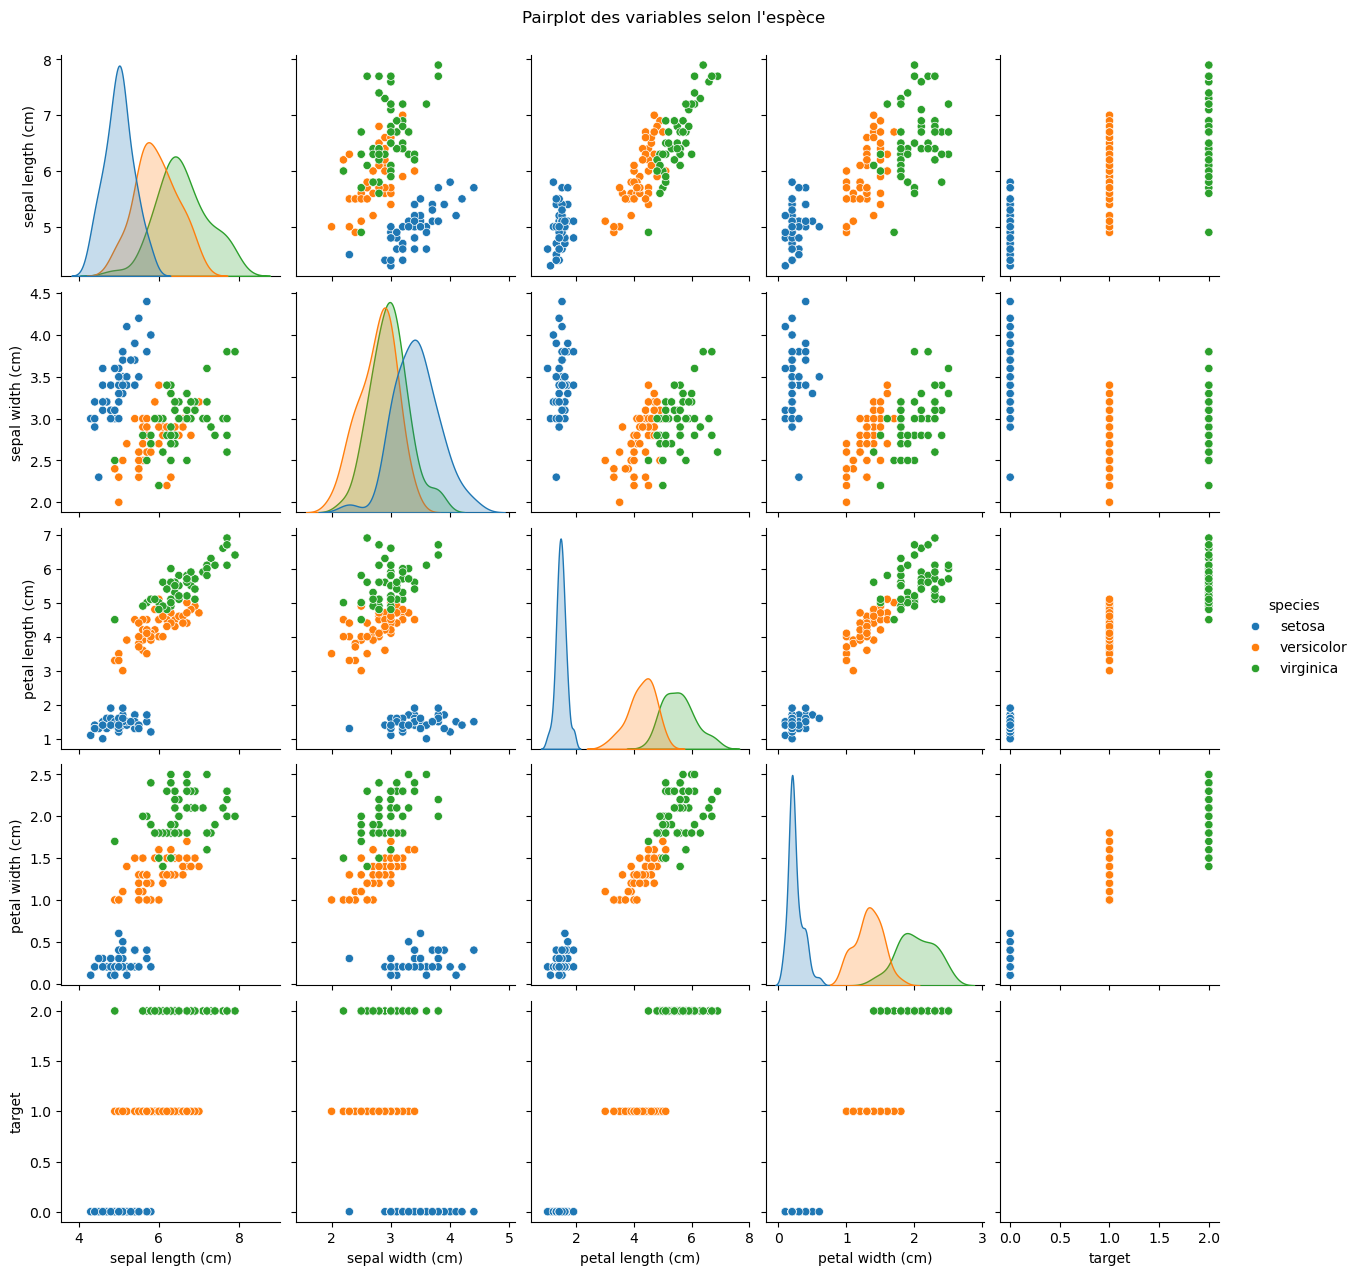

In [26]:
# Chargement du dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="target")

# Fusionner X et y dans un seul DataFrame
df = X.copy()
df["target"] = y
df["species"] = df["target"].apply(lambda x: iris.target_names[x])

# 1. Aperçu des données
print(df.head())
print("\nShape :", df.shape)

# 2. Statistiques descriptives
print("\nStatistiques :\n", df.describe())

# 3. Distribution des classes
sns.countplot(data=df, x="species")
plt.title("Répartition des classes")
plt.xlabel("Espèce d'iris")
plt.ylabel("Nombre d'observations")
plt.show()

# 4. Matrice de corrélation
plt.figure(figsize=(8, 6))
# Drop both 'target' and 'species' columns for correlation calculation
sns.heatmap(df.drop(columns=["target", "species"]).corr(), annot=True, cmap="coolwarm")
plt.title("Corrélation entre les variables")
plt.show()

# 5. Pairplot par classe
sns.pairplot(df, hue="species", diag_kind="kde")
plt.suptitle("Pairplot des variables selon l'espèce", y=1.02)
plt.show()

Accuracy Score: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



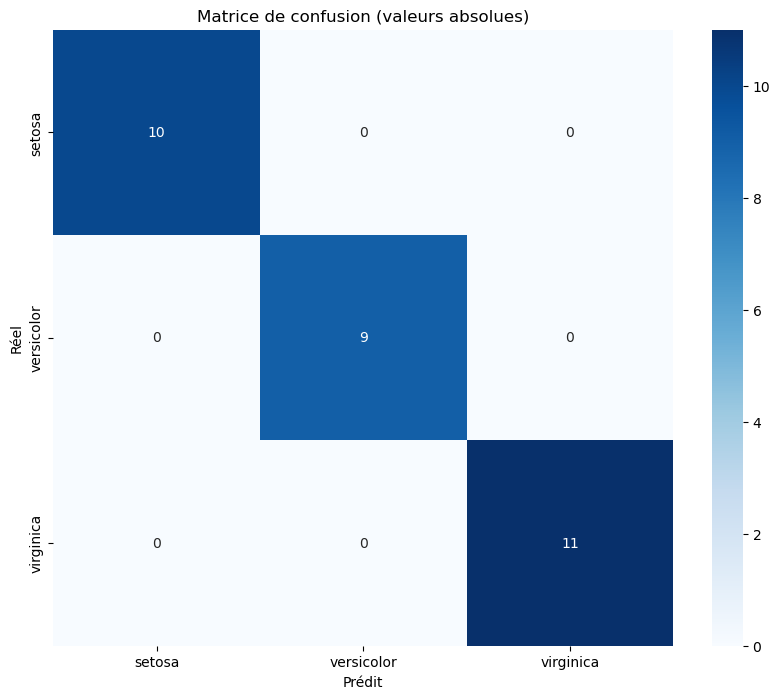

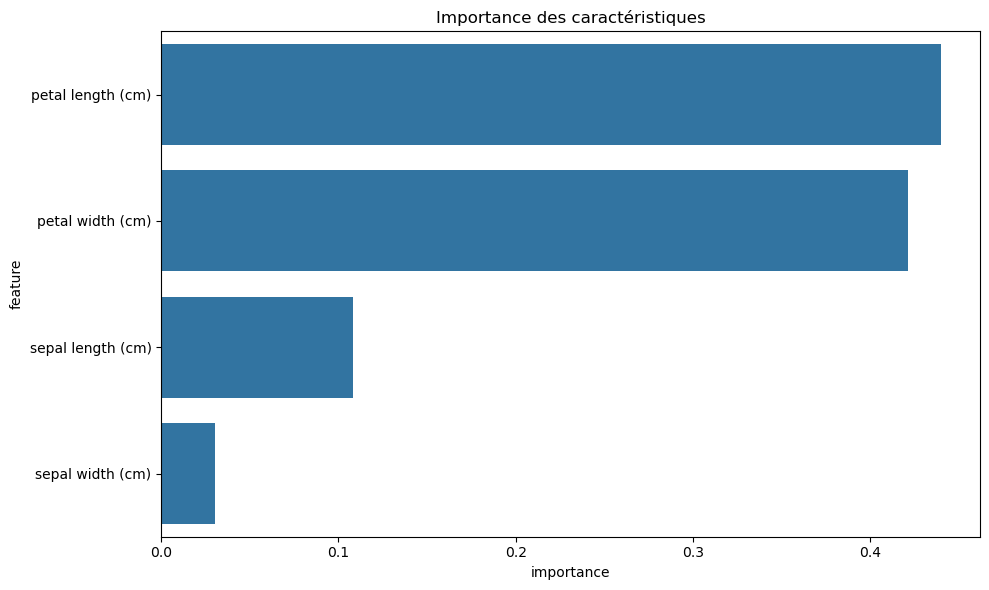

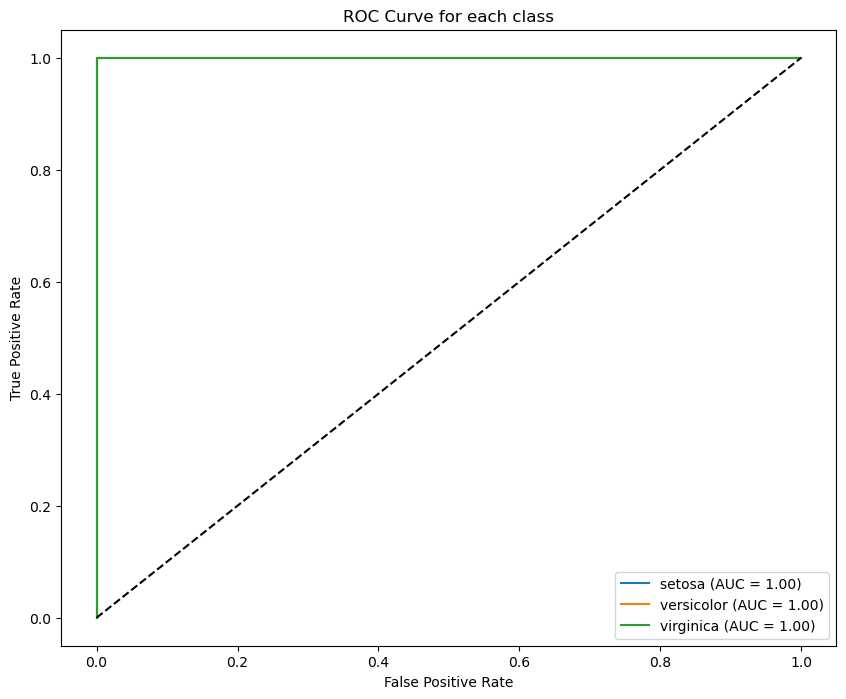

In [27]:
# 3. Découper en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Entraîner un modèle Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Specify number of trees
model.fit(X_train, y_train)

# 5. Prédictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)  # Get probability predictions

# 6. Évaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

# 7. Matrice de confusion avec pourcentages
plt.figure(figsize=(10, 8))
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot both raw counts and percentages
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Matrice de confusion (valeurs absolues)")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()

# 8. Feature importance
plt.figure(figsize=(10, 6))
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title("Importance des caractéristiques")
plt.tight_layout()
plt.show()

# 9. ROC Curve for multi-class (one-vs-rest)
plt.figure(figsize=(10, 8))
for i, species in enumerate(iris.target_names):
    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{species} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each class')
plt.legend(loc='best')
plt.show()

Résultats de la validation croisée (5-fold):
--------------------------------------------------
Logistic Regression: Accuracy = 0.9733 ± 0.0249
SVM: Accuracy = 0.9667 ± 0.0298
Random Forest: Accuracy = 0.9600 ± 0.0249
XGBoost: Accuracy = 0.9467 ± 0.0340


C:\Users\mdied\AppData\Local\Temp\ipykernel_47788\4144499967.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mean Accuracy', y='Model', data=cv_df, palette='viridis')


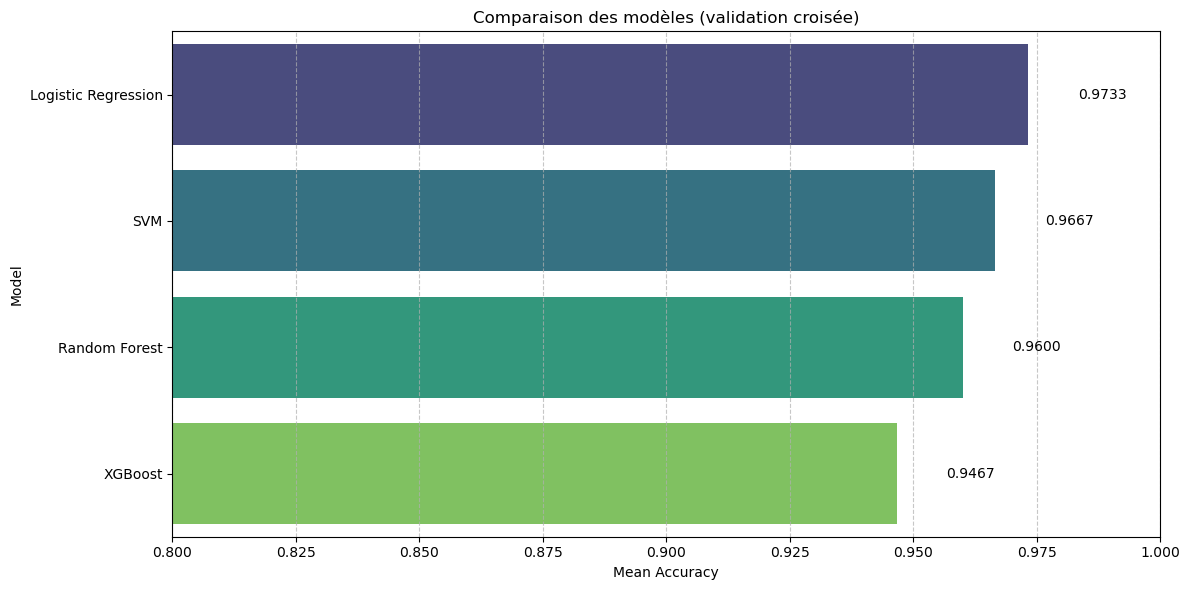


Meilleur modèle: Logistic Regression

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



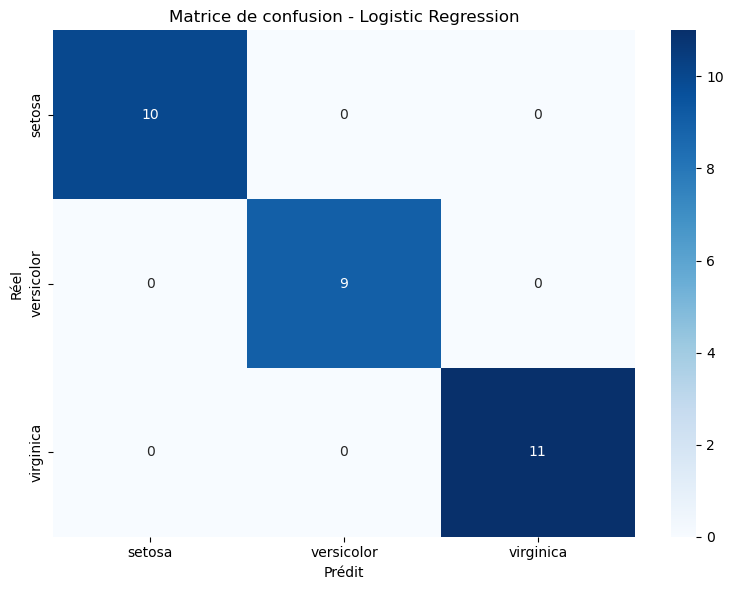


Optimisation des hyperparamètres pour Logistic Regression


c:\Users\mdied\OneDrive\Documents\Projets Personnels\Iris\Iris\.conda\Lib\site-packages\sklearn\linear_model\_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\mdied\OneDrive\Documents\Projets Personnels\Iris\Iris\.conda\Lib\site-packages\sklearn\linear_model\_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\mdied\OneDrive\Documents\Projets Personnels\Iris\Iris\.conda\Lib\site-packages\sklearn\linear_model\_logistic.py:1288: FutureWarning: Using the 'liblinear'

Meilleurs paramètres: {'C': 100, 'solver': 'liblinear'}
Meilleur score: 0.9800

Résultats du modèle optimisé:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



c:\Users\mdied\OneDrive\Documents\Projets Personnels\Iris\Iris\.conda\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mdied\OneDrive\Documents\Projets Personnels\Iris\Iris\.conda\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mdied\OneDrive\Documents\Projets Personnels\Iris\Iris\.conda\Lib\site-packages\sklearn\base.py", line 1363, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^

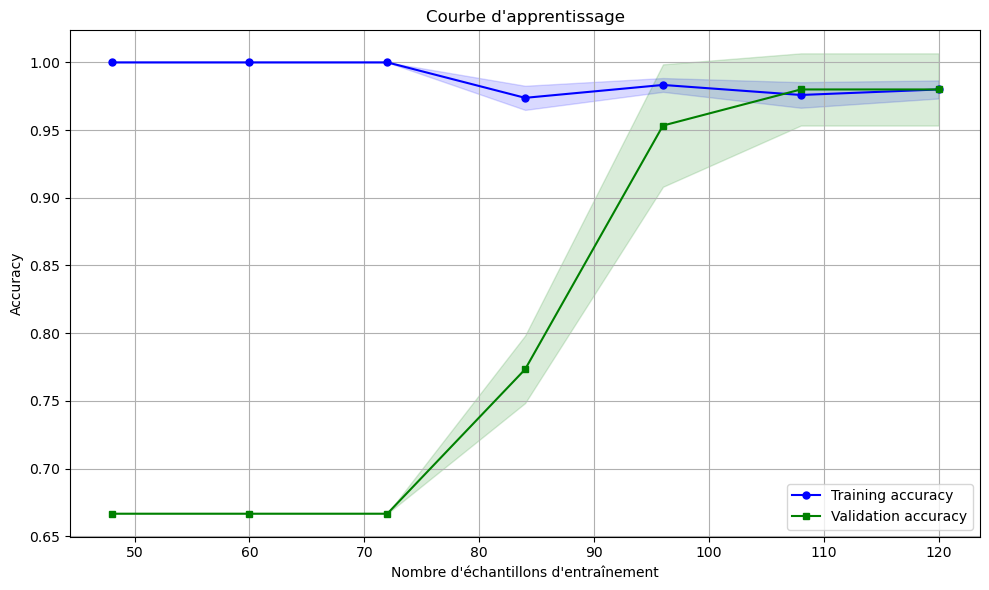

In [28]:
# 1. Définir les modèles à tester
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier.XGBClassifier(random_state=42)
}

# 2. Validation croisée
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = {}
cv_scores = []

print("Résultats de la validation croisée (5-fold):")
print("-" * 50)

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    cv_results[name] = scores
    cv_scores.append((name, scores.mean(), scores.std()))
    print(f"{name}: Accuracy = {scores.mean():.4f} ± {scores.std():.4f}")

# 3. Visualiser les résultats de la validation croisée
plt.figure(figsize=(12, 6))
cv_df = pd.DataFrame(cv_scores, columns=['Model', 'Mean Accuracy', 'Std'])
cv_df = cv_df.sort_values('Mean Accuracy', ascending=False)

sns.barplot(x='Mean Accuracy', y='Model', data=cv_df, palette='viridis')
plt.title('Comparaison des modèles (validation croisée)')
plt.xlim(0.8, 1.0)  # Ajuster selon vos résultats
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Ajouter les valeurs sur les barres
for i, v in enumerate(cv_df['Mean Accuracy']):
    plt.text(v + 0.01, i, f"{v:.4f}", va='center')

plt.tight_layout()
plt.show()

# 4. Entraîner le meilleur modèle sur l'ensemble complet
best_model_name = cv_df.iloc[0]['Model']
best_model = models[best_model_name]
best_model.fit(X_train, y_train)

# 5. Évaluer le meilleur modèle
y_pred = best_model.predict(X_test)
print(f"\nMeilleur modèle: {best_model_name}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# 6. Matrice de confusion pour le meilleur modèle
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title(f"Matrice de confusion - {best_model_name}")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.tight_layout()
plt.show()

# 7. Optimisation des hyperparamètres pour le meilleur modèle
print("\nOptimisation des hyperparamètres pour", best_model_name)

# Définir les paramètres à optimiser selon le meilleur modèle
if best_model_name == 'Logistic Regression':
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    }
elif best_model_name == 'SVM':
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': [0.01, 0.1, 1, 'scale'],
        'kernel': ['rbf', 'linear']
    }
elif best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
else:  # XGBoost
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2]
    }

# Recherche par grille avec validation croisée
grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

print(f"Meilleurs paramètres: {grid_search.best_params_}")
print(f"Meilleur score: {grid_search.best_score_:.4f}")

# 8. Modèle final avec les meilleurs paramètres
final_model = grid_search.best_estimator_
final_model.fit(X_train, y_train)
final_pred = final_model.predict(X_test)

print("\nRésultats du modèle optimisé:")
print(classification_report(y_test, final_pred, target_names=iris.target_names))

# 9. Courbes d'apprentissage pour le modèle final
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    final_model, X, y, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Courbe d\'apprentissage')
plt.xlabel('Nombre d\'échantillons d\'entraînement')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [29]:
import os

# Créer le dossier 'models' s'il n'existe pas
os.makedirs("models", exist_ok=True)


In [30]:
#  ✅ Créer le dossier s'il n'existe pas
os.makedirs("models", exist_ok=True)

#  ✅ Exporter le modèle et les features
joblib.dump(final_model, "models/iris_classifier_model.joblib")
joblib.dump(feature_names, "models/feature_names.joblib")

print("✅ Modèle exporté avec succès dans le dossier 'models/'")


✅ Modèle exporté avec succès dans le dossier 'models/'


In [31]:
joblib.load("models/feature_names.joblib")


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [37]:
# Étape 1 : Import et vérif
import os
import joblib

assert 'final_model' in globals(), "❌ Le modèle n'est pas défini."
assert 'feature_names' in globals(), "❌ Les noms de variables ne sont pas définis."

# Étape 2 : Créer le dossier s'il n'existe pas
os.makedirs("models", exist_ok=True)

# Étape 3 : Export du modèle et des features
joblib.dump(final_model, "models/iris_classifier_model.joblib")
joblib.dump(feature_names, "models/feature_names.joblib")

print("✅ Export terminé. Vérifie dans le dossier 'models/'.")


✅ Export terminé. Vérifie dans le dossier 'models/'.
